In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PREDICT ARTIST POPULARITY BASED ON METRICS

In [2]:
df = pd.read_csv("data_by_artist.csv")

In [3]:
df.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

We will remove the artist with only one song counted

In [4]:
df2 = df[df['count'] > 1]

In [5]:
df_pop = df2[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key', 'mode', 'popularity']]

In [6]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24449 entries, 0 to 27620
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      24449 non-null  float64
 1   danceability      24449 non-null  float64
 2   duration_ms       24449 non-null  float64
 3   energy            24449 non-null  float64
 4   instrumentalness  24449 non-null  float64
 5   liveness          24449 non-null  float64
 6   loudness          24449 non-null  float64
 7   speechiness       24449 non-null  float64
 8   tempo             24449 non-null  float64
 9   valence           24449 non-null  float64
 10  key               24449 non-null  int64  
 11  mode              24449 non-null  int64  
 12  popularity        24449 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.6 MB


In [7]:
df_pop.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,popularity
count,24449.000000,24449.000000,2.444900e+04,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000,24449.000000
mean,0.492088,0.547464,2.358111e+05,0.501564,0.165930,0.201745,-11.054097,0.093417,116.019587,0.522838,5.463127,0.775246,34.634262
std,0.366336,0.170448,1.167276e+05,0.250498,0.288306,0.133891,5.674927,0.112460,24.288422,0.238293,3.470796,0.417428,21.868964
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126000,0.436000,1.825000e+05,0.293800,0.000006,0.113550,-13.846000,0.039367,100.111500,0.347000,2.000000,1.000000,15.082569
50%,0.461500,0.557000,2.174144e+05,0.512500,0.002139,0.164500,-10.023000,0.052186,115.360800,0.535000,6.000000,1.000000,39.250000
75%,0.882571,0.670800,2.642935e+05,0.702571,0.193420,0.244556,-6.862500,0.095200,129.509554,0.706400,8.000000,1.000000,51.125000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,11.000000,1.000000,95.000000


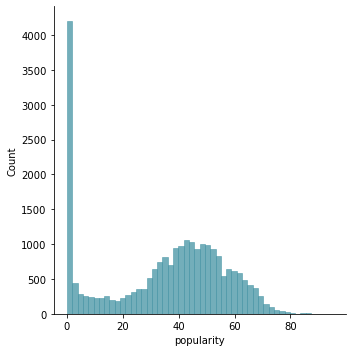

In [8]:
sns.displot(df_pop['popularity'], color='#4493a3', linewidth=0.5, edgecolor="#4493a3", bins=50)

fig, ax = plt.subplots(figsize = (6,4))
df_pop['popularity'].plot(kind = "hist", bins=50, color='#7fa55c')
plt.show()

We will remove the artists with low popularity to make the target more normal-like. This can become our test dataset.

In [9]:
df_pop_val = df_pop[df_pop['popularity'] >= 5]

In [10]:
df_pop_zero = df_pop[df_pop['popularity'] < 5]

In [11]:
len(df_pop_zero)

4806

C:\Users\frede\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


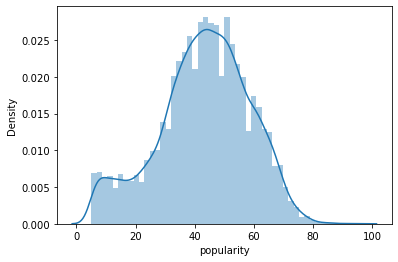

In [12]:
sns.distplot(df_pop_val['popularity'])

In [12]:
df_pop_val.sort_values(by='popularity', ascending = True).head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,popularity
19609,0.919000,0.206650,372180.000000,0.1908,0.462160,0.15150,-18.0485,0.044650,84.351500,0.148650,9,1,5.0
974,0.922667,0.374667,190355.666667,0.4010,0.535067,0.19300,-14.1010,0.091733,146.544667,0.476667,8,1,5.0
21077,0.985000,0.775000,192360.000000,0.2850,0.138000,0.10100,-9.8840,0.059700,83.803000,0.922000,5,1,5.0
2298,0.928000,0.560000,200000.000000,0.5690,0.399000,0.56000,-8.6550,0.121000,127.270000,0.521000,3,1,5.0
1241,0.678000,0.540000,91333.000000,0.6550,0.000000,0.23000,-5.6760,0.045900,106.989000,0.857000,0,1,5.0
18080,0.843000,0.511000,284400.000000,0.3300,0.000000,0.10000,-13.0870,0.045900,125.245000,0.219000,3,1,5.0
23966,0.996000,0.797000,181320.000000,0.4490,0.895000,0.18200,-12.5920,0.082600,113.216000,0.902000,0,1,5.0
15264,0.964000,0.511000,152173.000000,0.2520,0.010200,0.20100,-17.0980,0.057800,121.824000,0.673000,7,1,5.0
21716,0.784000,0.393000,148720.000000,0.2890,0.000000,0.07210,-17.3710,0.123000,207.988000,0.532000,7,1,5.0
11389,0.927000,0.470000,287335.000000,0.9610,0.013400,0.78000,-4.9030,0.231000,92.053000,0.227000,4,1,5.0


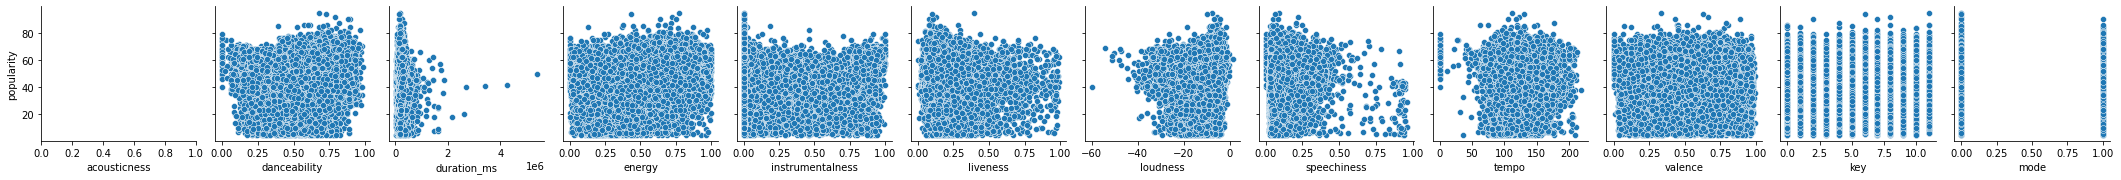

In [14]:


sns.pairplot(data=df_pop_val,
                  y_vars=['popularity'],
                  x_vars=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key', 'mode'])

C:\Users\frede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\frede\anacond

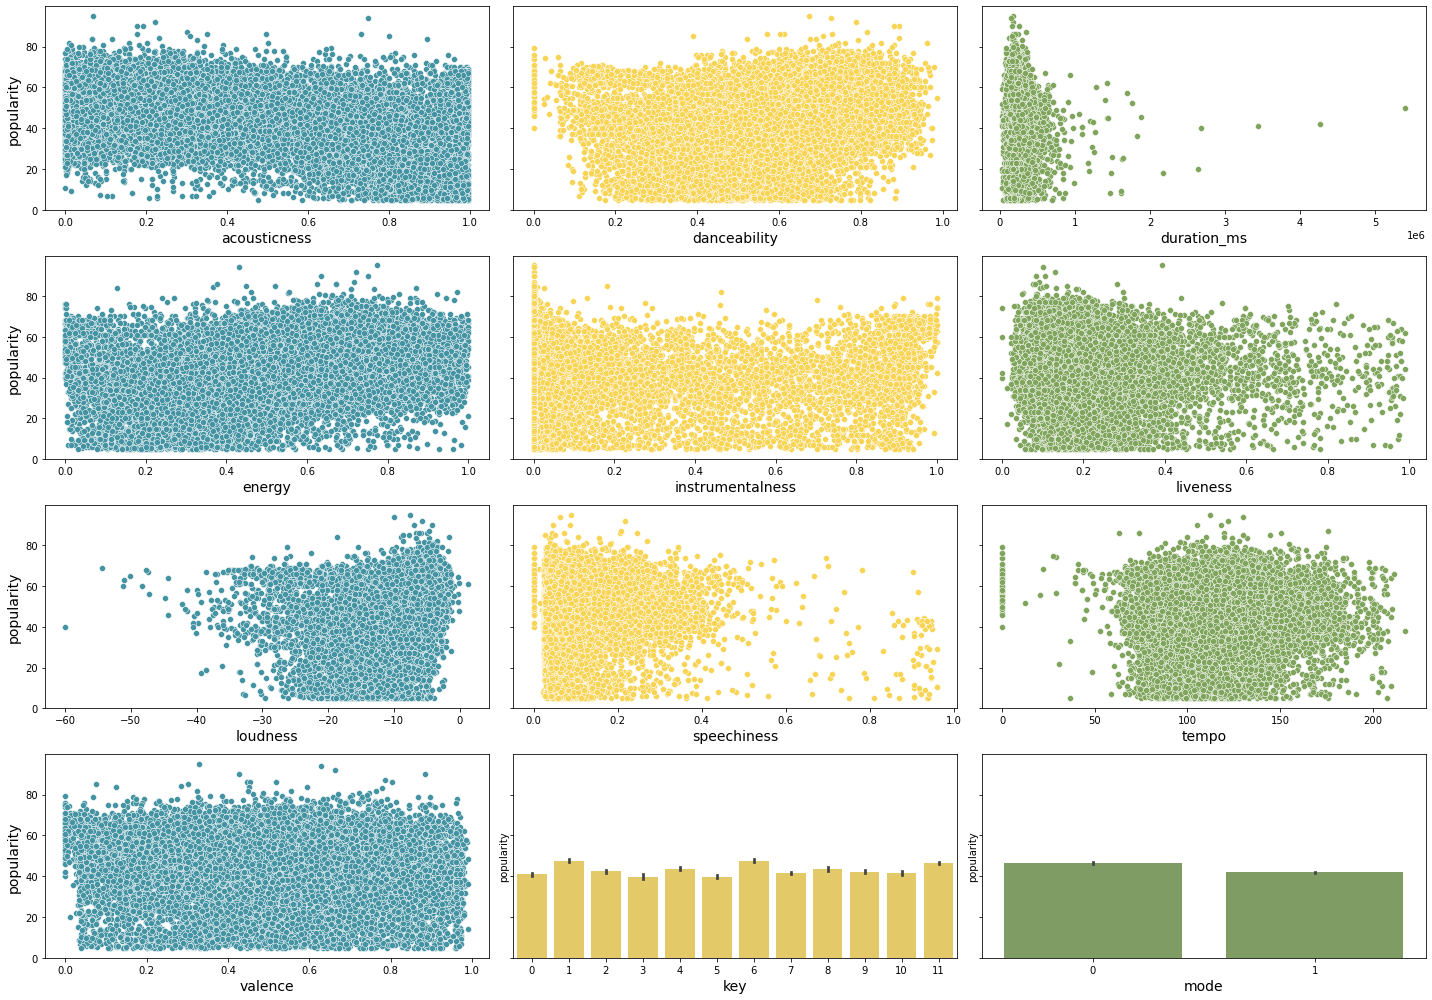

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20,14), sharey=True)
#fig.subplots_adjust(wspace=0.2)

ax1 = sns.scatterplot(df_pop_val['acousticness'], df_pop_val['popularity'], color='#4493a3', ax=axes[0,0])
ax2 = sns.scatterplot(df_pop_val['danceability'], df_pop_val['popularity'], color='#f8d455', ax=axes[0,1])
ax3 = sns.scatterplot(df_pop_val['duration_ms'], df_pop_val['popularity'], color='#7fa55c', ax=axes[0,2])
ax4 = sns.scatterplot(df_pop_val['energy'], df_pop_val['popularity'], color='#4493a3', ax=axes[1,0])
ax5 = sns.scatterplot(df_pop_val['instrumentalness'], df_pop_val['popularity'], color='#f8d455', ax=axes[1,1])
ax6 = sns.scatterplot(df_pop_val['liveness'], df_pop_val['popularity'], color='#7fa55c', ax=axes[1,2])
ax7 = sns.scatterplot(df_pop_val['loudness'], df_pop_val['popularity'], color='#4493a3', ax=axes[2,0])
ax8 = sns.scatterplot(df_pop_val['speechiness'], df_pop_val['popularity'], color='#f8d455', ax=axes[2,1])
ax9 = sns.scatterplot(df_pop_val['tempo'], df_pop_val['popularity'], color='#7fa55c', ax=axes[2,2])
ax10 = sns.scatterplot(df_pop_val['valence'], df_pop_val['popularity'], color='#4493a3', ax=axes[3,0])
ax11 = sns.barplot(df_pop_val['key'], df_pop_val['popularity'], color='#f8d455', ax=axes[3,1])
ax12 = sns.barplot(df_pop_val['mode'], df_pop_val['popularity'], color='#7fa55c', ax=axes[3,2])

ax1.set_ylabel('popularity', fontsize=14)
ax4.set_ylabel('popularity', fontsize=14)
ax7.set_ylabel('popularity', fontsize=14)
ax10.set_ylabel('popularity', fontsize=14)

ax1.set_xlabel('acousticness', fontsize=14)
ax2.set_xlabel('danceability', fontsize=14)
ax3.set_xlabel('duration_ms', fontsize=14)
ax4.set_xlabel('energy', fontsize=14)
ax5.set_xlabel('instrumentalness', fontsize=14)
ax6.set_xlabel('liveness', fontsize=14)
ax7.set_xlabel('loudness', fontsize=14)
ax8.set_xlabel('speechiness', fontsize=14)
ax9.set_xlabel('tempo', fontsize=14)
ax10.set_xlabel('valence', fontsize=14)
ax11.set_xlabel('key', fontsize=14)
ax12.set_xlabel('mode', fontsize=14)

fig.tight_layout()

fig.savefig("pairplot_popularity.png")

clearly, no correlation between metrics and popularity

Let's still try some linear models with just metrics feature (mode and key, out)

In [13]:
from sklearn.model_selection import train_test_split

X = df_pop_val[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]
Y = df_pop_val[['popularity']]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size= 0.2, random_state = 13)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR

LINEAR REGRESSION

In [15]:
scal = StandardScaler()
scal.fit(X_train)
X_train_scal = scal.transform(X_train)
X_val_scal = scal.transform(X_val)

linreg = LinearRegression()
linreg.fit(X_train_scal, Y_train)



LinearRegression()

In [16]:
predictions = linreg.predict(X_val_scal)

In [17]:
print('MAE', mean_absolute_error(predictions, Y_val))

MAE 10.314758280130395


In [21]:
result_dict={}

for i in range(1,21):
    df_pop_val2 = df_pop[df_pop['popularity'] >= i]
    
    X2 = df_pop_val2[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]
    Y2 = df_pop_val2[['popularity']]

    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X2, Y2, test_size= 0.2, random_state = 13)

    scal2 = StandardScaler()
    scal2.fit(X_train2)
    X_train_scal2 = scal2.transform(X_train2)
    X_val_scal2 = scal.transform(X_val2)

    linreg2 = LinearRegression()
    linreg2.fit(X_train_scal2, Y_train2)
    predictions2 = linreg.predict(X_val_scal2)
    
    
    result_dict.update({i:mean_absolute_error(predictions2, Y_val2)})

In [22]:
result_dict

{1: 11.361257078914091,
 2: 11.193615095472842,
 3: 10.925319966356755,
 4: 10.57013434198384,
 5: 10.314758280130395,
 6: 10.465898002732889,
 7: 10.10547082264489,
 8: 10.283693299248004,
 9: 10.082907654400488,
 10: 10.171993641876728,
 11: 9.787329878076322,
 12: 9.98856943328492,
 13: 9.67678642058442,
 14: 9.696752786740936,
 15: 9.580070971948278,
 16: 9.665122892787501,
 17: 9.724292161957123,
 18: 9.493763309181434,
 19: 9.578408324162467,
 20: 9.404369774836677}

RANDOM FOREST REGRESSOR

In [18]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=13)

rfr.fit(X_train, Y_train)

<ipython-input-18-03bdbef4a629>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, Y_train)


RandomForestRegressor(max_depth=5, n_estimators=10, random_state=13)

In [19]:
rfr_predictions = rfr.predict(X_val)

In [20]:
print('MAE', mean_absolute_error(rfr_predictions, Y_val))

MAE 9.313029061752173


In [21]:
rfr.feature_importances_

array([0.14377043, 0.0707005 , 0.05262026, 0.00294006, 0.04914324,
       0.0834072 , 0.46200651, 0.00295319, 0.00123795, 0.13122067])

In [22]:
feat_imp = pd.DataFrame(zip(X.columns, rfr.feature_importances_), columns=['feature', 'rfr feat importance'])

In [23]:
feat_imp

,feature,rfr feat importance
0,acousticness,0.143770
1,danceability,0.070701
2,duration_ms,0.052620
3,energy,0.002940
4,instrumentalness,0.049143
5,liveness,0.083407
6,loudness,0.462007
7,speechiness,0.002953
8,tempo,0.001238
9,valence,0.131221


GRADIENT BOOSTING REGRESSOR

In [24]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=13)
gbrt.fit(X_train, Y_train)

C:\Users\frede\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=13)

In [25]:
gbrt_predictions = gbrt.predict(X_val)

In [26]:
print('MAE', mean_absolute_error(gbrt_predictions, Y_val))

MAE 9.96654430230712


In [27]:
gbrt.feature_importances_

array([0.14692867, 0.08067296, 0.01574362, 0.        , 0.04212971,
       0.        , 0.5180112 , 0.        , 0.        , 0.19651383])

In [28]:
feat_imp['gbrt feat imp'] = gbrt.feature_importances_

In [29]:
feat_imp.sort_values(by='rfr feat importance', ascending=False)

,feature,rfr feat importance,gbrt feat imp
6,loudness,0.462007,0.518011
0,acousticness,0.143770,0.146929
9,valence,0.131221,0.196514
5,liveness,0.083407,0.000000
1,danceability,0.070701,0.080673
2,duration_ms,0.052620,0.015744
4,instrumentalness,0.049143,0.042130
7,speechiness,0.002953,0.000000
3,energy,0.002940,0.000000
8,tempo,0.001238,0.000000


In [30]:
results = pd.DataFrame({'models' : ['LinearReg', 'RandomForest', 'GradientBoostingReg'],
                       'MAE' : [mean_absolute_error(predictions, Y_val), 
                                        mean_absolute_error(rfr_predictions, Y_val), 
                                        mean_absolute_error(gbrt_predictions, Y_val)]},
                      columns=['models', 'MAE'])

In [31]:
results.sort_values(by='MAE', ascending=True)

,models,MAE
1,RandomForest,9.313029
2,GradientBoostingReg,9.966544
0,LinearReg,10.314758


Let's calculate our 'test' values with RandomForest Model

In [74]:
X_test = df_pop_zero[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]

Y_test = df_pop_zero[['popularity']]

In [75]:
rfr_test_predictions = rfr.predict(X_test)

In [76]:
print('MAE', mean_absolute_error(rfr_test_predictions, Y_test))

MAE 28.325226795745035


In [77]:
Y_test['predictions'] = rfr_test_predictions

<ipython-input-77-aaa388a3cff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test['predictions'] = rfr_test_predictions


In [78]:
Y_test

,popularity,predictions
6,0.000000,32.170475
8,2.000000,23.422275
54,0.000000,57.000639
65,0.000000,23.422275
66,0.000000,25.449203
...,...,...
27545,2.647059,23.422275
27549,0.351351,24.022735
27557,1.476190,36.831131
27589,2.541667,23.422275


C:\Users\frede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'popularity prediction')

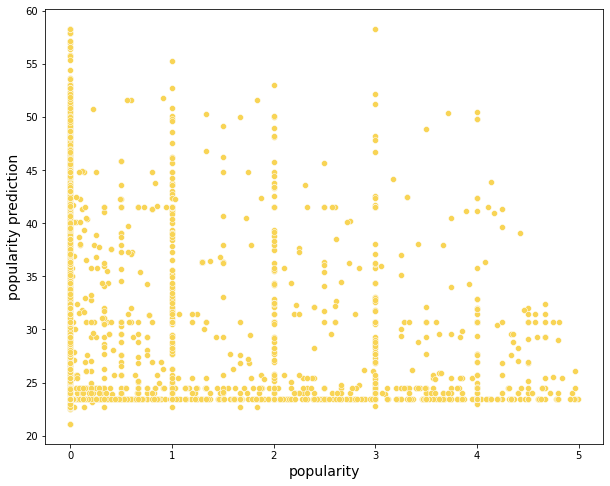

In [94]:
plt.figure(figsize=(10,8));

sns.scatterplot(Y_test['popularity'], Y_test['predictions'], color='#f8d455')

plt.xlabel('popularity', size=14)
plt.ylabel('popularity prediction', size=14)

In [82]:
df_pop_zero['pop prediction'] = rfr_test_predictions

<ipython-input-82-84ba52518bee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_zero['pop prediction'] = rfr_test_predictions


Text(0, 0.5, 'popularity prediction')

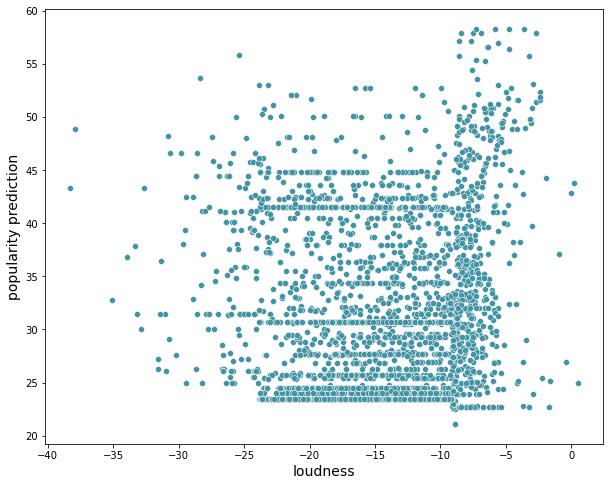

In [92]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_pop_zero, x='loudness', y='pop prediction', color='#4493a3')
plt.xlabel('loudness', size=14)
plt.ylabel('popularity prediction', size=14)

Text(0, 0.5, 'popularity prediction')

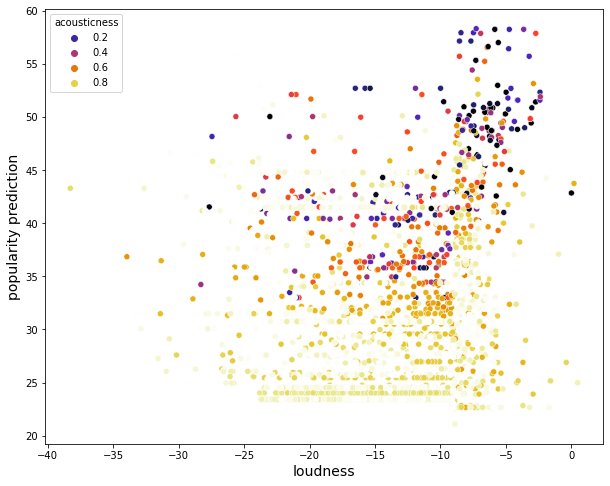

In [98]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_pop_zero, x='loudness', y='pop prediction', hue='acousticness', palette='CMRmap')
plt.xlabel('loudness', size=14)
plt.ylabel('popularity prediction', size=14)

Text(0, 0.5, 'popularity prediction')

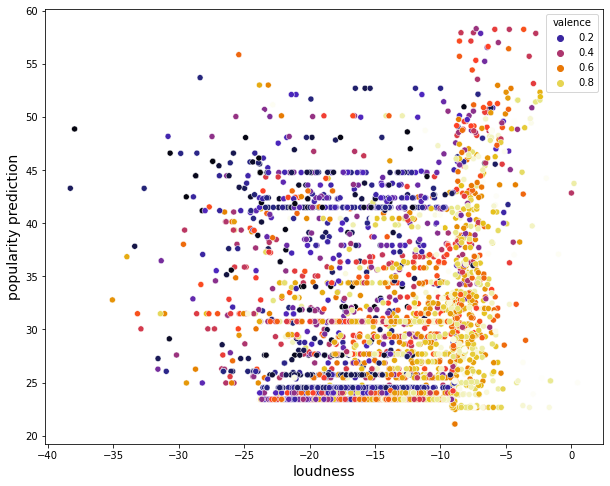

In [99]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_pop_zero, x='loudness', y='pop prediction', hue='valence', palette='CMRmap')
plt.xlabel('loudness', size=14)
plt.ylabel('popularity prediction', size=14)

NB : removing just the song with very low popularity (below 5) makes the model slightly less efficient on Train/Val but seems to generalize better on Test